<a href="https://colab.research.google.com/github/shakib-nsu/shakibahamednorthsouthuniversity0.github.io/blob/main/Stop_Sign_Detective_with_raw_python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Install any additional libraries we might need
!pip install scikit-image
!pip install imutils

print("Setup complete!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Setup complete!


In [73]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from skimage import exposure
import pickle
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")


All libraries imported successfully!


In [74]:
# Navigate to your dataset folder
dataset_path = '/content/drive/MyDrive/Python Project/CSE445/DATA_SET'

# List contents to find your dataset folder
print("Contents of your Google Drive:")
!ls "/content/drive/MyDrive/Python Project/CSE445/DATA_SET"

# You'll need to replace 'YourDatasetFolderName' with the actual folder name from the output above
# For now, let's explore the structure


Contents of your Google Drive:
NON_STOP_SIGN  STOP_SIGN


In [75]:
# Updated with your dataset path
DATASET_FOLDER = '/content/drive/MyDrive/Python Project/CSE445/DATA_SET'

# Check if the folder exists and explore its structure
if os.path.exists(DATASET_FOLDER):
    print(f"Dataset folder found at: {DATASET_FOLDER}")
    print("\nFolder contents:")
    !ls -la "{DATASET_FOLDER}"
else:
    print("Dataset folder not found. Please check the path.")
    print("Available folders:")
    !find "/content/drive/MyDrive" -type d -maxdepth 3


Dataset folder found at: /content/drive/MyDrive/Python Project/CSE445/DATA_SET

Folder contents:
total 8
drwx------ 2 root root 4096 Aug 19 13:09 NON_STOP_SIGN
drwx------ 2 root root 4096 Aug 19 13:09 STOP_SIGN


In [76]:
# Updated with your dataset path and correct folder names
DATASET_FOLDER = '/content/drive/MyDrive/Python Project/CSE445/DATA_SET'

# Check if the folder exists and explore its structure
if os.path.exists(DATASET_FOLDER):
    print(f"Dataset folder found at: {DATASET_FOLDER}")
    print("\nFolder contents:")
    !ls -la "{DATASET_FOLDER}"

    # Check the subfolders
    stop_folder = os.path.join(DATASET_FOLDER, 'STOP_SIGN')
    non_stop_folder = os.path.join(DATASET_FOLDER, 'NON_STOP_SIGN')

    if os.path.exists(stop_folder):
        print(f"\nSTOP_SIGN folder contents (first 5 files):")
        !ls "{stop_folder}" | head -5

    if os.path.exists(non_stop_folder):
        print(f"\nNON_STOP_SIGN folder contents (first 5 files):")
        !ls "{non_stop_folder}" | head -5
else:
    print("Dataset folder not found. Please check the path.")
    print("Available folders:")
    !find "/content/drive/MyDrive" -type d -maxdepth 3


Dataset folder found at: /content/drive/MyDrive/Python Project/CSE445/DATA_SET

Folder contents:
total 8
drwx------ 2 root root 4096 Aug 19 13:09 NON_STOP_SIGN
drwx------ 2 root root 4096 Aug 19 13:09 STOP_SIGN

STOP_SIGN folder contents (first 5 files):
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg

NON_STOP_SIGN folder contents (first 5 files):
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg


 Dataset folder found at: /content/drive/MyDrive/Python Project/CSE445/DATA_SET

 Folder contents:
total 8
drwx------ 2 root root 4096 Aug 19 13:09 NON_STOP_SIGN
drwx------ 2 root root 4096 Aug 19 13:09 STOP_SIGN

 STOP_SIGN folder analysis:
 Total files: 56

 STOP_SIGN Images - Visual Preview:


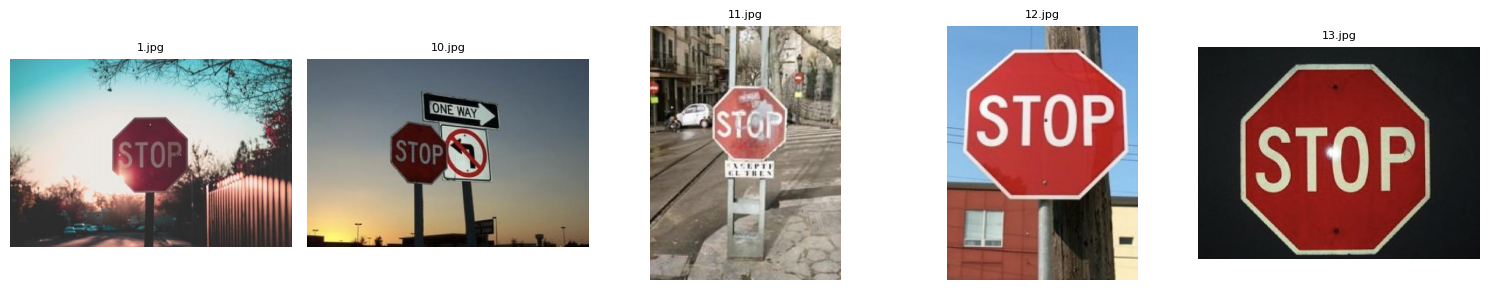

 Total images in folder: 56

 NON_STOP_SIGN folder analysis:
 Total files: 65

 NON_STOP_SIGN Images - Visual Preview:


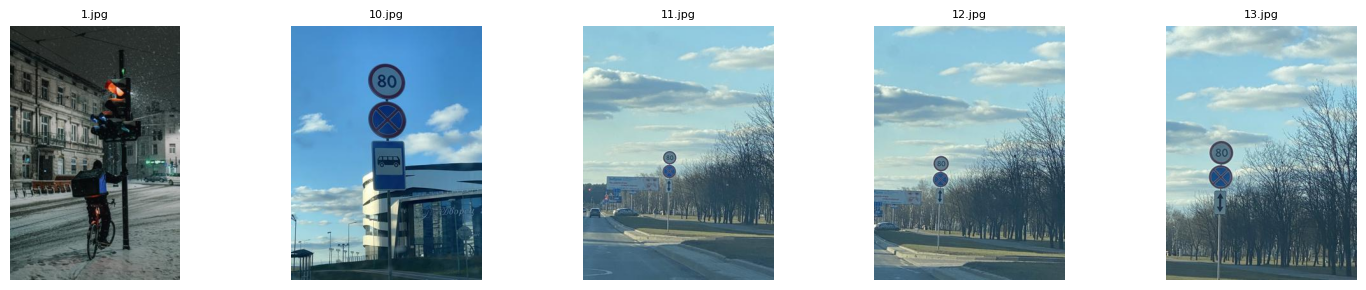

 Total images in folder: 65


In [77]:
import matplotlib.pyplot as plt
import cv2
import os

# Updated with your dataset path and correct folder names
DATASET_FOLDER = '/content/drive/MyDrive/Python Project/CSE445/DATA_SET'

def display_images_from_folder(folder_path, num_images=5, title="Images"):
    """
    Display sample images from a folder with their filenames
    """
    if not os.path.exists(folder_path):
        print(f"Folder {folder_path} not found!")
        return

    print(f"\n {title} - Visual Preview:")

    # Get all image files
    image_files = [f for f in os.listdir(folder_path)
                   if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    if not image_files:
        print("No image files found in this folder!")
        return

    # Limit to requested number of images
    image_files = sorted(image_files)[:num_images]

    # Create subplot for images
    plt.figure(figsize=(15, 3))

    for i, filename in enumerate(image_files):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path)

        if img is not None:
            # Convert BGR to RGB for proper display
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(image_files), i + 1)
            plt.imshow(img_rgb)
            plt.title(filename, fontsize=8)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f" Total images in folder: {len(os.listdir(folder_path))}")

# Check if the folder exists and explore its structure
if os.path.exists(DATASET_FOLDER):
    print(f" Dataset folder found at: {DATASET_FOLDER}")
    print("\n Folder contents:")
    !ls -la "{DATASET_FOLDER}"

    # Check the subfolders
    stop_folder = os.path.join(DATASET_FOLDER, 'STOP_SIGN')
    non_stop_folder = os.path.join(DATASET_FOLDER, 'NON_STOP_SIGN')

    if os.path.exists(stop_folder):
        print(f"\n STOP_SIGN folder analysis:")
        print(f" Total files: {len(os.listdir(stop_folder))}")
        display_images_from_folder(stop_folder, num_images=5, title="STOP_SIGN Images")

    if os.path.exists(non_stop_folder):
        print(f"\n NON_STOP_SIGN folder analysis:")
        print(f" Total files: {len(os.listdir(non_stop_folder))}")
        display_images_from_folder(non_stop_folder, num_images=5, title="NON_STOP_SIGN Images")

else:
    print(" Dataset folder not found. Please check the path.")
    print(" Available folders:")
    !find "/content/drive/MyDrive" -type d -maxdepth 3


In [78]:
# Load and Prepare Image Data

import cv2
import numpy as np
import os

def enhanced_image_preprocessing(images, target_size=(128, 128)):
    """
    Advanced preprocessing to reduce pixelation and improve quality
    """
    processed_images = []

    print("Applying enhanced preprocessing to reduce pixelation...")
    for i, img in enumerate(images):
        # 1. Increase target resolution (128x128 instead of 64x64)
        img_resized = cv2.resize(img, target_size, interpolation=cv2.INTER_CUBIC)

        # 2. Noise reduction using bilateral filter
        img_denoised = cv2.bilateralFilter(img_resized, 9, 75, 75)

        # 3. Enhance contrast using CLAHE
        lab = cv2.cvtColor(img_denoised, cv2.COLOR_BGR2LAB)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        lab[:,:,0] = clahe.apply(lab[:,:,0])
        img_enhanced = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

        # 4. Sharpen the image to improve edges
        kernel_sharpening = np.array([[-1,-1,-1],
                                     [-1, 9,-1],
                                     [-1,-1,-1]])
        img_sharpened = cv2.filter2D(img_enhanced, -1, kernel_sharpening)

        # 5. Normalize pixel values
        img_normalized = cv2.normalize(img_sharpened, None, 0, 255, cv2.NORM_MINMAX)

        processed_images.append(img_normalized)

        if (i + 1) % 50 == 0:
            print(f"Enhanced {i + 1}/{len(images)} images")

    return np.array(processed_images)

def load_dataset_high_quality(dataset_path, target_size=(128, 128)):
    """
    Load dataset while preserving image quality
    """
    images = []
    labels = []

    stop_sign_folder = os.path.join(dataset_path, 'STOP_SIGN')
    non_stop_sign_folder = os.path.join(dataset_path, 'NON_STOP_SIGN')

    print(f"Loading high-quality dataset from:")
    print(f"- STOP_SIGN: {stop_sign_folder}")
    print(f"- NON_STOP_SIGN: {non_stop_sign_folder}")

    if os.path.exists(stop_sign_folder) and os.path.exists(non_stop_sign_folder):
        print("Found both folders")

        # Load stop sign images (label = 1)
        print("Loading STOP_SIGN images with quality preservation...")
        stop_count = 0
        for filename in os.listdir(stop_sign_folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                img_path = os.path.join(stop_sign_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    # Load at higher resolution first, then process
                    if img.shape[0] > 256 or img.shape[1] > 256:
                        img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC)
                    images.append(img)
                    labels.append(1)
                    stop_count += 1

        print(f"Loaded {stop_count} STOP_SIGN images")

        # Load non-stop sign images (label = 0)
        print("Loading NON_STOP_SIGN images with quality preservation...")
        non_stop_count = 0
        for filename in os.listdir(non_stop_sign_folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                img_path = os.path.join(non_stop_sign_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    if img.shape[0] > 256 or img.shape[1] > 256:
                        img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_CUBIC)
                    images.append(img)
                    labels.append(0)
                    non_stop_count += 1

        print(f"Loaded {non_stop_count} NON_STOP_SIGN images")

        # Apply enhanced preprocessing to all images
        if len(images) > 0:
            images = enhanced_image_preprocessing(np.array(images), target_size)

    return np.array(images), np.array(labels)

# Load your dataset with enhanced quality processing
DATASET_PATH = '/content/drive/MyDrive/Python Project/CSE445/DATA_SET'
images, labels = load_dataset_high_quality(DATASET_PATH, target_size=(128, 128))

print(f"\nEnhanced Dataset Summary:")
print(f"Total images loaded: {len(images)}")
if len(images) > 0:
    print(f"Enhanced image shape: {images[0].shape}")
    print(f"Stop signs (label=1): {np.sum(labels == 1)}")
    print(f"Non-stop signs (label=0): {np.sum(labels == 0)}")
else:
    print("No images loaded - please check your dataset path")


Loading high-quality dataset from:
- STOP_SIGN: /content/drive/MyDrive/Python Project/CSE445/DATA_SET/STOP_SIGN
- NON_STOP_SIGN: /content/drive/MyDrive/Python Project/CSE445/DATA_SET/NON_STOP_SIGN
Found both folders
Loading STOP_SIGN images with quality preservation...
Loaded 56 STOP_SIGN images
Loading NON_STOP_SIGN images with quality preservation...
Loaded 65 NON_STOP_SIGN images
Applying enhanced preprocessing to reduce pixelation...
Enhanced 50/121 images
Enhanced 100/121 images

Enhanced Dataset Summary:
Total images loaded: 121
Enhanced image shape: (128, 128, 3)
Stop signs (label=1): 56
Non-stop signs (label=0): 65


Starting quality-preserving augmentation...
Original dataset size: 121 images
Augmented 50/121 original images
Augmented 100/121 original images

Augmentation completed!
Augmented dataset shape: (968, 128, 128, 3)
Expansion factor: 8.0x
Augmented class distribution:
  - Non-stop signs: 520
  - Stop signs: 448

Visualizing augmentation examples:


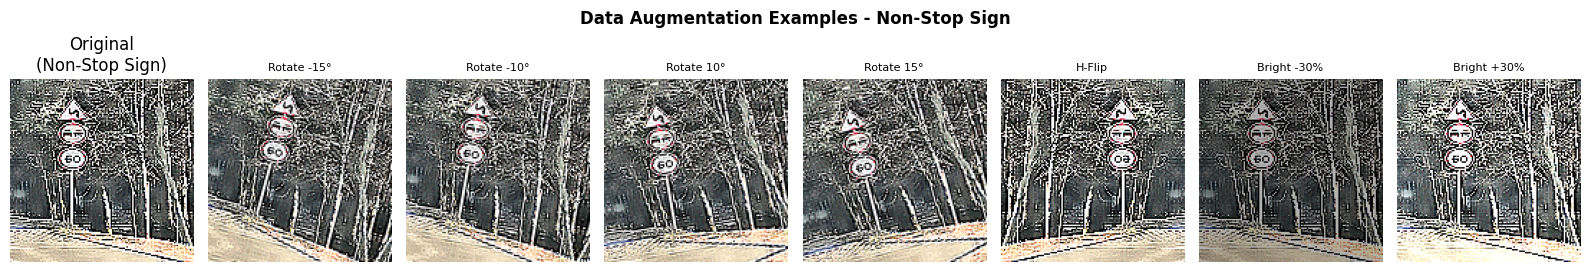

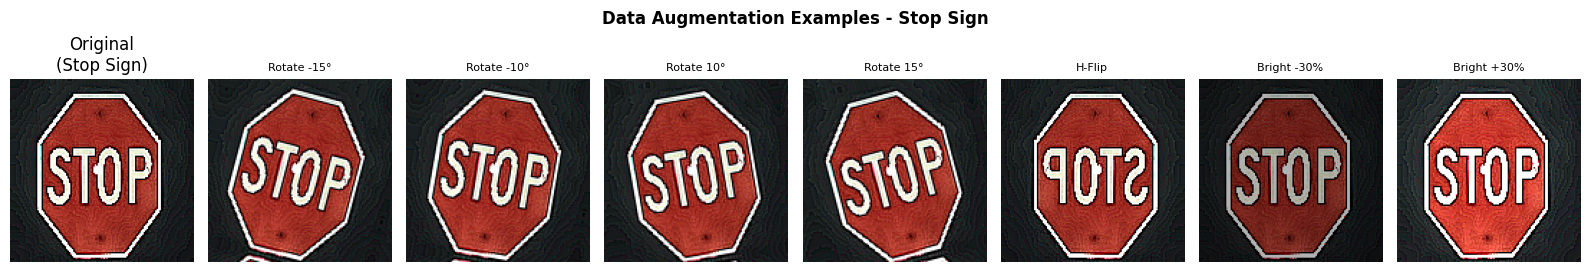


Final dataset summary:
Total images: 968
Stop signs: 448
Non-stop signs: 520


In [79]:
# Data Augmentation


import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from PIL import Image

def augment_image(image):
    """
    Enhanced augmentation function that creates 8 versions of each image:
    1 original + 4 rotations + 1 flip + 2 brightness variations
    """
    augmented_images = []

    # Original image
    augmented_images.append(image.copy())

    # 1. Rotation (±15, ±10 degrees) - Quality-preserving
    for angle in [-15, -10, 10, 15]:
        # Use OpenCV for better quality rotation
        rows, cols = image.shape[:2]
        rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
        rotated = cv2.warpAffine(image, rotation_matrix, (cols, rows),
                               flags=cv2.INTER_CUBIC,
                               borderMode=cv2.BORDER_REFLECT)
        augmented_images.append(rotated)

    # 2. Horizontal flip
    flipped_h = cv2.flip(image, 1)
    augmented_images.append(flipped_h)

    # 3. Brightness adjustment (±30%) - Improved method
    for factor in [0.7, 1.3]:
        bright_img = cv2.convertScaleAbs(image, alpha=factor, beta=0)
        augmented_images.append(bright_img)

    return augmented_images

def quality_preserving_augmentation(images, labels):
    """
    Apply augmentation to entire dataset while preserving image quality
    """
    print(f"Starting quality-preserving augmentation...")
    print(f"Original dataset size: {len(images)} images")

    # Augment the dataset
    augmented_data = []
    augmented_labels = []

    for i, (img, label) in enumerate(zip(images, labels)):
        aug_imgs = augment_image(img)
        augmented_data.extend(aug_imgs)
        augmented_labels.extend([label] * len(aug_imgs))

        # Progress indicator
        if (i + 1) % 50 == 0:
            print(f"Augmented {i + 1}/{len(images)} original images")

    # Convert augmented data to NumPy arrays
    augmented_data = np.array(augmented_data)
    augmented_labels = np.array(augmented_labels)

    print(f"\nAugmentation completed!")
    print(f"Augmented dataset shape: {augmented_data.shape}")
    print(f"Expansion factor: {len(augmented_data) / len(images):.1f}x")
    print(f"Augmented class distribution:")
    print(f"  - Non-stop signs: {np.sum(augmented_labels == 0)}")
    print(f"  - Stop signs: {np.sum(augmented_labels == 1)}")

    return augmented_data, augmented_labels

def visualize_augmented_images(original_img, aug_imgs, label, category):
    """
    Visualize original image and all its augmented versions
    """
    plt.figure(figsize=(16, 3))

    # Original image
    plt.subplot(1, 8, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Original\n({category})")
    plt.axis('off')

    # Augmented images
    titles = ['Rotate -15°', 'Rotate -10°', 'Rotate 10°', 'Rotate 15°',
              'H-Flip', 'Bright -30%', 'Bright +30%']

    for i, (aug_img, title) in enumerate(zip(aug_imgs[1:], titles)):
        plt.subplot(1, 8, i + 2)
        plt.imshow(cv2.cvtColor(aug_img, cv2.COLOR_BGR2RGB))
        plt.title(title, fontsize=8)
        plt.axis('off')

    plt.suptitle(f'Data Augmentation Examples - {category}', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Apply enhanced augmentation to your dataset
if 'images' in locals() and 'labels' in locals() and len(images) > 0:

    # Apply augmentation
    images_augmented, labels_augmented = quality_preserving_augmentation(images, labels)

    # Replace original dataset with augmented version
    images = images_augmented
    labels = labels_augmented

    # Categories for visualization
    categories = ['Non-Stop Sign', 'Stop Sign']

    # Visualize examples from each class
    print(f"\nVisualizing augmentation examples:")
    for label_val, category in enumerate(categories):
        # Find first image of this class
        class_indices = np.where(labels_augmented == label_val)[0]
        if len(class_indices) > 0:
            # Get the first original image index of this class
            original_idx = class_indices[0] - (class_indices[0] % 8)

            # Get all 8 versions of this image
            aug_versions = []
            for j in range(8):
                if original_idx + j < len(images_augmented):
                    aug_versions.append(images_augmented[original_idx + j])

            if len(aug_versions) >= 8:
                visualize_augmented_images(aug_versions[0], aug_versions,
                                         label_val, category)

    print(f"\nFinal dataset summary:")
    print(f"Total images: {len(images)}")
    print(f"Stop signs: {np.sum(labels == 1)}")
    print(f"Non-stop signs: {np.sum(labels == 0)}")

else:
    print("No images found! Please run the 'Load and Prepare Image Data' cell first.")
    print("Make sure 'images' and 'labels' variables are loaded in your notebook.")

Starting enhanced feature extraction...
Extracting enhanced features from high-resolution images...
Processed 100/968 images
Processed 200/968 images
Processed 300/968 images
Processed 400/968 images
Processed 500/968 images
Processed 600/968 images
Processed 700/968 images
Processed 800/968 images
Processed 900/968 images

Enhanced Feature Extraction Completed!
Feature matrix shape: (968, 1796)
Feature vector length per image: 1796
Visualizing 6 enhanced images:


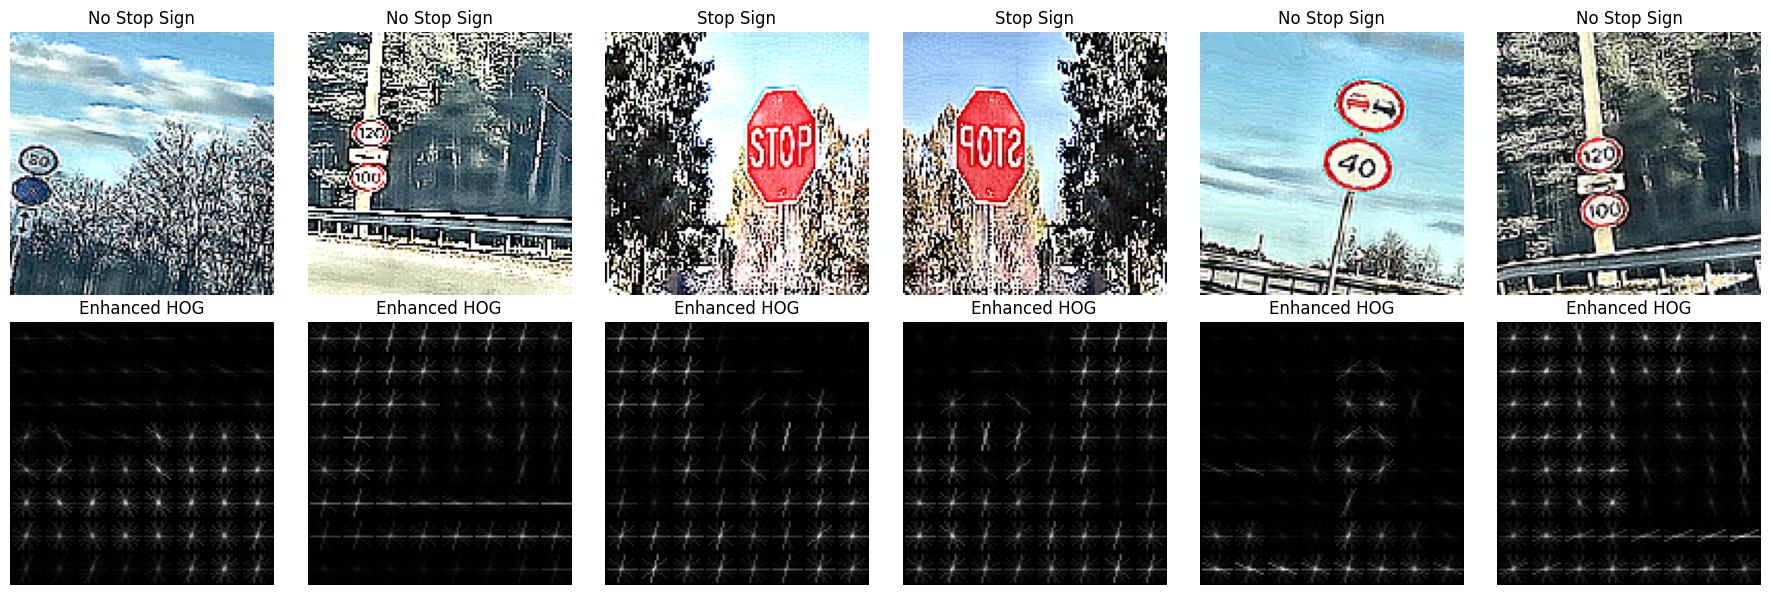

In [80]:
#Extract HOG Features and Visualize

# REPLACE YOUR CURRENT CELL 6 WITH THIS
from skimage.feature import hog
import matplotlib.pyplot as plt

def extract_enhanced_features_high_res(images, image_size=(128, 128)):
    """
    Extract features from higher resolution images to reduce pixelation artifacts
    """
    features = []

    print("Extracting enhanced features from high-resolution images...")
    for i, img in enumerate(images):
        # Ensure correct size with better interpolation
        img_resized = cv2.resize(img, image_size, interpolation=cv2.INTER_CUBIC)

        # 1. HOG features with adjusted parameters for 128x128 images
        gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        hog_features = hog(gray,
                          orientations=9,
                          pixels_per_cell=(16, 16),  # Larger cells for higher resolution
                          cells_per_block=(2, 2),
                          block_norm='L2-Hys',
                          visualize=False)

        # 2. Enhanced color features with better red detection
        hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)

        # Improved red color detection
        red_mask1 = cv2.inRange(hsv, (0, 120, 120), (10, 255, 255))
        red_mask2 = cv2.inRange(hsv, (170, 120, 120), (180, 255, 255))
        red_mask = cv2.bitwise_or(red_mask1, red_mask2)

        # Color histogram features
        red_hist = cv2.calcHist([hsv], [0], red_mask, [2], [0, 180])
        red_hist = red_hist.flatten()
        if red_hist.sum() > 0:
            red_hist = red_hist / red_hist.sum()  # Normalize

        # 3. Edge and texture features
        edges = cv2.Canny(gray, 50, 150)
        edge_density = np.sum(edges > 0) / (edges.shape[0] * edges.shape[1])

        # 4. Shape analysis for octagonal detection
        contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        shape_features = []

        if contours:
            largest_contour = max(contours, key=cv2.contourArea)
            area = cv2.contourArea(largest_contour)
            perimeter = cv2.arcLength(largest_contour, True)

            if perimeter > 0:
                # Circularity (closer to 1 for circular/octagonal shapes)
                circularity = 4 * np.pi * area / (perimeter * perimeter)
                # Relative area
                relative_area = area / (image_size[0] * image_size[1])
                shape_features = [circularity, relative_area]
            else:
                shape_features = [0, 0]
        else:
            shape_features = [0, 0]

        # 5. Red pixel analysis
        red_percentage = np.sum(red_mask > 0) / (red_mask.shape[0] * red_mask.shape[1])

        # 6. Texture features using Local Binary Pattern
        from skimage import feature
        lbp = feature.local_binary_pattern(gray, 24, 3, method='uniform')
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=26, range=(0, 26))
        lbp_hist = lbp_hist.astype(float)
        lbp_hist /= (lbp_hist.sum() + 1e-7)  # Normalize

        # Combine all features
        combined_features = np.concatenate([
            hog_features,           # Shape and edge information
            red_hist,              # Color information
            [edge_density, red_percentage],  # Basic features
            shape_features,        # Geometric features
            lbp_hist              # Texture features
        ])

        features.append(combined_features)

        if (i + 1) % 100 == 0:
            print(f"Processed {i + 1}/{len(images)} images")

    return np.array(features)

def visualize_enhanced_features(images, labels, num_samples=6):
    """
    Visualize enhanced images and their features
    """
    if len(images) == 0:
        print("No images to visualize")
        return

    print(f"Visualizing {num_samples} enhanced images:")

    fig, axes = plt.subplots(2, num_samples, figsize=(18, 6))

    # Select random samples
    indices = np.random.choice(len(images), size=min(num_samples, len(images)), replace=False)

    for i, idx in enumerate(indices):
        # Original enhanced image
        img_rgb = cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB)
        axes[0, i].imshow(img_rgb)
        axes[0, i].set_title(f'{"Stop Sign" if labels[idx] == 1 else "No Stop Sign"}')
        axes[0, i].axis('off')

        # HOG visualization
        gray = cv2.cvtColor(images[idx], cv2.COLOR_BGR2GRAY)
        hog_features_vis, hog_image = hog(gray, orientations=9, pixels_per_cell=(16, 16),
                                        cells_per_block=(2, 2), visualize=True)

        axes[1, i].imshow(hog_image, cmap='gray')
        axes[1, i].set_title('Enhanced HOG')
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

# Extract enhanced features
if len(images) > 0:
    print("Starting enhanced feature extraction...")
    enhanced_features = extract_enhanced_features_high_res(images, image_size=(128, 128))

    print(f"\nEnhanced Feature Extraction Completed!")
    print(f"Feature matrix shape: {enhanced_features.shape}")
    print(f"Feature vector length per image: {enhanced_features.shape[1]}")

    # Use enhanced features for training
    hog_features = enhanced_features

    # Show visualization
    visualize_enhanced_features(images, labels, num_samples=6)

else:
    print("No images available for feature extraction")


In [81]:
#Split Dataset and Scale Features


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
if 'hog_features' in locals() and 'labels' in locals() and len(hog_features) > 0:
    X_train, X_test, y_train, y_test = train_test_split(
        hog_features, labels, test_size=0.2, random_state=42, stratify=labels
    )

    # Scale features for better performance
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print(f"✅ Data split completed:")
    print(f"📊 Training set size: {X_train_scaled.shape}")
    print(f"📊 Test set size: {X_test_scaled.shape}")
    print(f"🛑 Training - Stop signs: {np.sum(y_train == 1)}, Non-stop signs: {np.sum(y_train == 0)}")
    print(f"🧪 Testing - Stop signs: {np.sum(y_test == 1)}, Non-stop signs: {np.sum(y_test == 0)}")
else:
    print("❌ Cannot split data - no features or labels available")


✅ Data split completed:
📊 Training set size: (774, 1796)
📊 Test set size: (194, 1796)
🛑 Training - Stop signs: 358, Non-stop signs: 416
🧪 Testing - Stop signs: 90, Non-stop signs: 104


In [84]:
#Train Multiple ML Models
# Training SVM and AdaBoost Models


from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import time

def train_svm_and_adaboost(X_train, y_train):
    """
    Train both SVM and AdaBoost models
    """
    models = {}
    training_times = {}

    print("Training SVM and AdaBoost models...")
    print("=" * 50)

    # 1. Train SVM (RBF kernel)
    print("Training SVM (RBF kernel)...")
    start_time = time.time()
    svm_model = SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        probability=True,
        random_state=42
    )
    svm_model.fit(X_train, y_train)
    svm_time = time.time() - start_time
    models['SVM'] = svm_model
    training_times['SVM'] = svm_time
    print(f"SVM training completed in {svm_time:.2f} seconds")

    # 2. Train AdaBoost
    print("\nTraining AdaBoost...")
    start_time = time.time()
    ada_model = AdaBoostClassifier(
        n_estimators=100,
        learning_rate=1.0,
        random_state=42
    )
    ada_model.fit(X_train, y_train)
    ada_time = time.time() - start_time
    models['AdaBoost'] = ada_model
    training_times['AdaBoost'] = ada_time
    print(f"AdaBoost training completed in {ada_time:.2f} seconds")

    print(f"\nTraining Time Comparison:")
    for model_name, time_taken in training_times.items():
        print(f"  {model_name}: {time_taken:.2f} seconds")

    return models, training_times

# Train both models
if 'X_train_scaled' in locals() and 'y_train' in locals():
    print("Starting SVM & AdaBoost training...")
    trained_models, training_times = train_svm_and_adaboost(X_train_scaled, y_train)
    print("Training completed successfully!")
else:
    print("Cannot train models - training data not available")
    print("Please run the previous cells first:")
    print("1. Load and prepare image data")
    print("2. Extract features")
    print("3. Split dataset and scale features")


Starting SVM & AdaBoost training...
Training SVM and AdaBoost models...
Training SVM (RBF kernel)...
SVM training completed in 2.65 seconds

Training AdaBoost...
AdaBoost training completed in 27.30 seconds

Training Time Comparison:
  SVM: 2.65 seconds
  AdaBoost: 27.30 seconds
Training completed successfully!



DETAILED PERFORMANCE RESULTS:

SVM PERFORMANCE:
  Train Accuracy: 1.0000 (100.00%)
  Test Accuracy:  0.9948 (99.48%)
  Overfitting:    0.0052

Complete Classification Report:
              precision    recall  f1-score   support

No Stop Sign     0.9905    1.0000    0.9952       104
   Stop Sign     1.0000    0.9889    0.9944        90

    accuracy                         0.9948       194
   macro avg     0.9952    0.9944    0.9948       194
weighted avg     0.9949    0.9948    0.9948       194

Confusion Matrix:
    Predicted ---->>  [No Stop]  [Stop]
    Actual [No Stop]:    104       0
           [Stop]:         1      89

Visual Confusion Matrix for SVM:


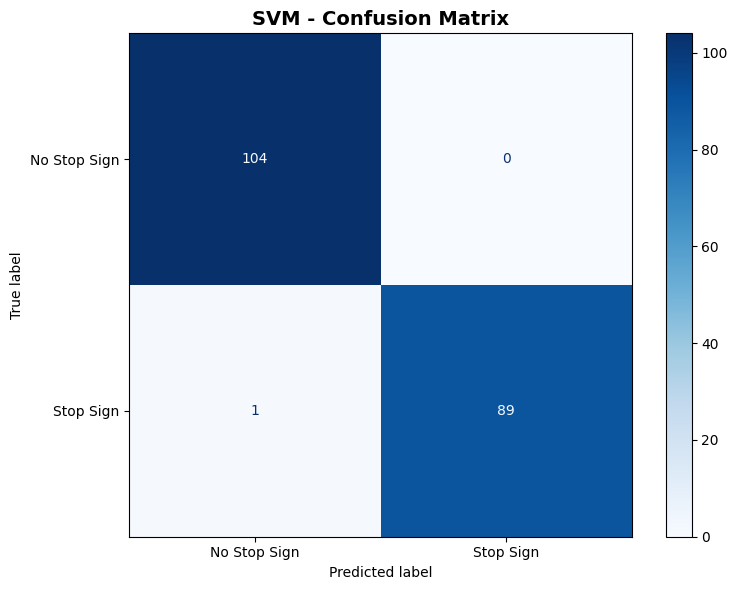

------------------------------------------------------------

AdaBoost PERFORMANCE:
  Train Accuracy: 1.0000 (100.00%)
  Test Accuracy:  0.9485 (94.85%)
  Overfitting:    0.0515

Complete Classification Report:
              precision    recall  f1-score   support

No Stop Sign     0.9608    0.9423    0.9515       104
   Stop Sign     0.9348    0.9556    0.9451        90

    accuracy                         0.9485       194
   macro avg     0.9478    0.9489    0.9483       194
weighted avg     0.9487    0.9485    0.9485       194

Confusion Matrix:
    Predicted ---->>  [No Stop]  [Stop]
    Actual [No Stop]:     98       6
           [Stop]:         4      86

Visual Confusion Matrix for AdaBoost:


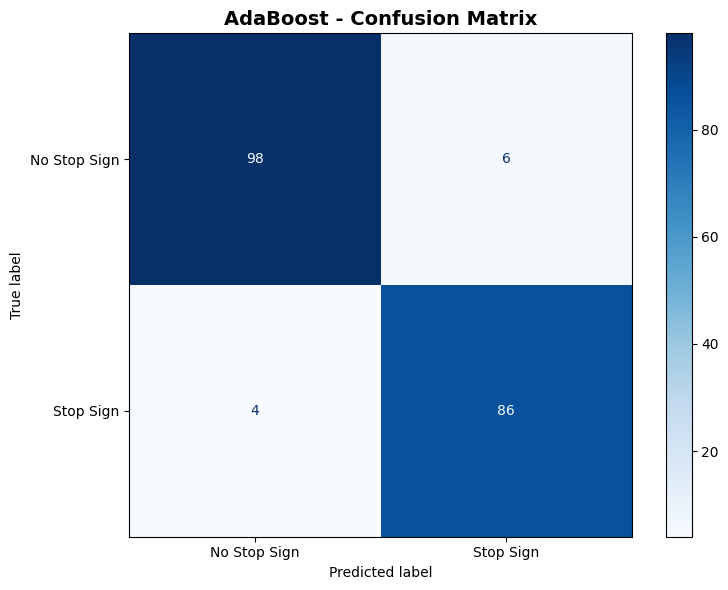

------------------------------------------------------------

WINNER: SVM
Best Test Accuracy: 0.9948 (99.48%)
Performance: SVM outperforms AdaBoost by 4.64%

SAVING BEST MODEL:
Best model and scaler saved successfully!
Files saved:
   - /content/best_model_svm_adaboost.pkl
   - /content/scaler_svm_adaboost.pkl

VISUAL PREDICTION RESULTS - BOTH MODELS COMPARISON:
Comparing predictions from both models on same 10 test images:

Text Results for SVM:
  Sample  1: True: No Stop Sign | Pred: No Stop Sign | CORRECT
  Sample  2: True: Stop Sign    | Pred: Stop Sign    | CORRECT
  Sample  3: True: No Stop Sign | Pred: No Stop Sign | CORRECT
  Sample  4: True: No Stop Sign | Pred: No Stop Sign | CORRECT
  Sample  5: True: No Stop Sign | Pred: No Stop Sign | CORRECT
  Sample  6: True: Stop Sign    | Pred: Stop Sign    | CORRECT
  Sample  7: True: Stop Sign    | Pred: Stop Sign    | CORRECT
  Sample  8: True: Stop Sign    | Pred: Stop Sign    | CORRECT
  Sample  9: True: Stop Sign    | Pred: Stop 

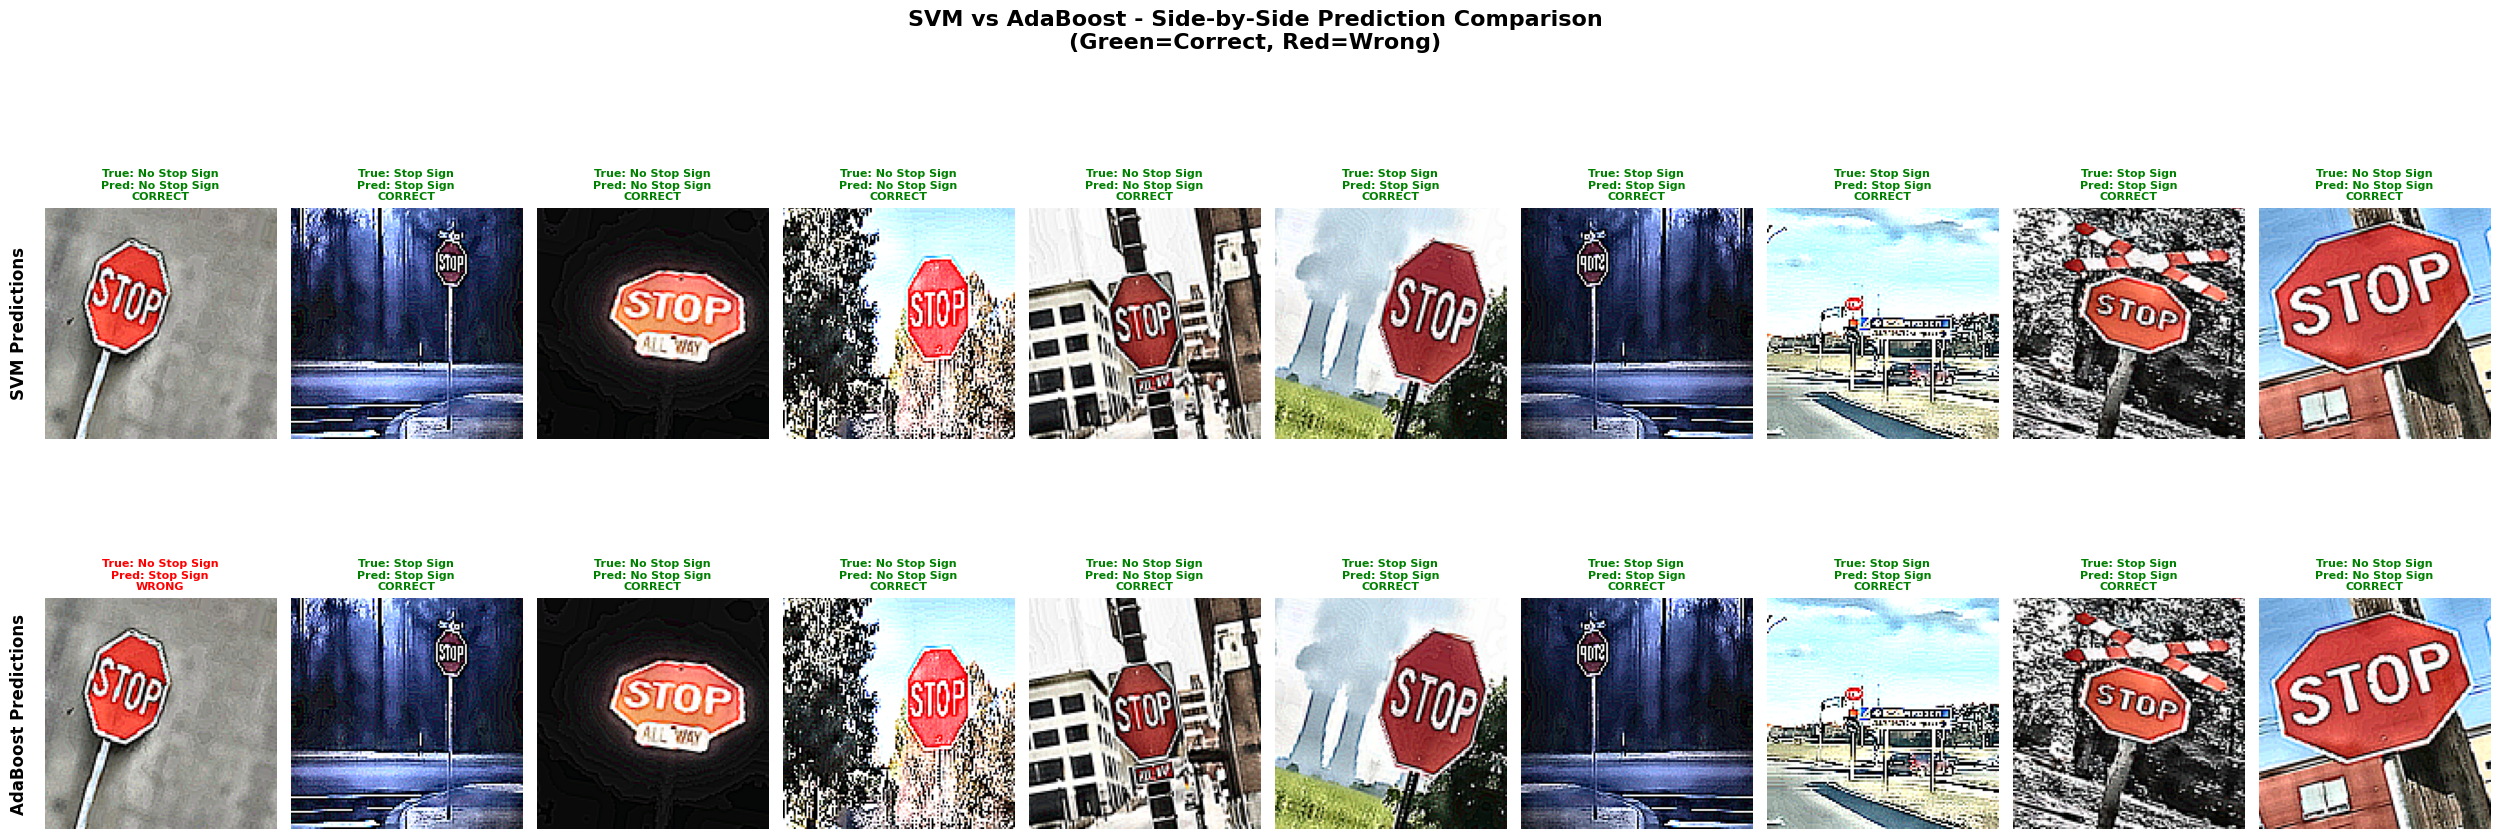


SIDE-BY-SIDE COMPARISON SUMMARY:
SVM:
   Sample Accuracy: 10/10 = 100.0%
   Overall Test Accuracy: 99.48%
AdaBoost:
   Sample Accuracy: 9/10 = 90.0%
   Overall Test Accuracy: 94.85%

EVALUATION SUMMARY:
Best Model: SVM
Test Accuracy: 99.48%
Test Set Size: 194 samples
Model Status: Saved Successfully
Model Quality: EXCELLENT

Complete evaluation finished!
Best model available as 'best_model' and 'svm_model'


In [86]:
# Complete Evaluation, Model Saving & Visualization


# Complete Evaluation, Model Saving & Visualization for Both Models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle
import numpy as np
import cv2

def complete_evaluation_and_visualization(trained_models, X_train, y_train, X_test, y_test, images=None):
    """
    Complete evaluation with detailed results, model saving, and visualization for both models
    """
    results = {}

    print(f"\n{'='*70}")
    print("DETAILED PERFORMANCE RESULTS:")
    print(f"{'='*70}")

    for model_name, model in trained_models.items():
        print(f"\n{model_name} PERFORMANCE:")

        # Training accuracy
        train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_pred)

        # Test accuracy
        test_pred = model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_pred)

        # Overfitting check
        overfitting = abs(train_accuracy - test_accuracy)

        results[model_name] = {
            'model': model,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'overfitting': overfitting,
            'predictions': test_pred
        }

        print(f"  Train Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
        print(f"  Test Accuracy:  {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
        print(f"  Overfitting:    {overfitting:.4f}")

        # Complete Classification Report
        print(f"\nComplete Classification Report:")
        print(classification_report(y_test, test_pred,
                                  target_names=['No Stop Sign', 'Stop Sign'],
                                  digits=4))

        # Confusion Matrix (Text)
        cm = confusion_matrix(y_test, test_pred)
        print(f"Confusion Matrix:")
        print(f"    Predicted ---->>  [No Stop]  [Stop]")
        print(f"    Actual [No Stop]: {cm[0,0]:6d}    {cm[0,1]:4d}")
        print(f"           [Stop]:    {cm[1,0]:6d}    {cm[1,1]:4d}")

        # Visual Confusion Matrix
        print(f"\nVisual Confusion Matrix for {model_name}:")
        disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                     display_labels=['No Stop Sign', 'Stop Sign'])

        fig, ax = plt.subplots(figsize=(8, 6))
        disp.plot(cmap=plt.cm.Blues, ax=ax)
        plt.title(f'{model_name} - Confusion Matrix', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

        print("-" * 60)

    # Determine best model
    best_model_name = max(results.keys(), key=lambda x: results[x]['test_accuracy'])
    best_model = results[best_model_name]['model']
    best_accuracy = results[best_model_name]['test_accuracy']

    print(f"\nWINNER: {best_model_name}")
    print(f"Best Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

    # Performance comparison
    model_names = list(results.keys())
    if len(model_names) >= 2:
        acc1 = results[model_names[0]]['test_accuracy']
        acc2 = results[model_names[1]]['test_accuracy']

        if abs(acc1 - acc2) < 0.01:
            print("Performance: Both models perform similarly")
        elif acc1 > acc2:
            print(f"Performance: {model_names[0]} outperforms {model_names[1]} by {(acc1 - acc2)*100:.2f}%")
        else:
            print(f"Performance: {model_names[1]} outperforms {model_names} by {(acc2 - acc1)*100:.2f}%")

    # Save the best model
    print(f"\n{'='*70}")
    print("SAVING BEST MODEL:")
    print(f"{'='*70}")

    try:
        # Save best model
        with open('/content/best_model_svm_adaboost.pkl', 'wb') as f:
            pickle.dump(best_model, f)

        # Save scaler if available
        if 'scaler' in globals():
            with open('/content/scaler_svm_adaboost.pkl', 'wb') as f:
                pickle.dump(scaler, f)
            print("Best model and scaler saved successfully!")
            print("Files saved:")
            print("   - /content/best_model_svm_adaboost.pkl")
            print("   - /content/scaler_svm_adaboost.pkl")
        else:
            print("Best model saved successfully!")
            print("Files saved:")
            print("   - /content/best_model_svm_adaboost.pkl")

    except Exception as e:
        print(f"Error saving model: {e}")

    # Visual Predictions for BOTH MODELS (10 Random Samples Each)
    print(f"\n{'='*70}")
    print("VISUAL PREDICTION RESULTS - BOTH MODELS COMPARISON:")
    print(f"{'='*70}")

    if images is not None and len(images) > 0:
        # Select 10 random test samples (same for both models for fair comparison)
        num_samples = min(10, len(y_test))
        random_indices = np.random.choice(len(y_test), num_samples, replace=False)

        print(f"Comparing predictions from both models on same {num_samples} test images:")

        # Create figure for both models
        fig, axes = plt.subplots(2, num_samples, figsize=(25, 10))

        # Model names for iteration
        model_names_list = list(trained_models.keys())

        for model_idx, (model_name, model) in enumerate(trained_models.items()):
            predictions = results[model_name]['predictions']

            print(f"\nText Results for {model_name}:")
            correct_predictions = 0

            for img_idx, test_idx in enumerate(random_indices):
                # Map test index back to original images (approximate)
                img_idx_mapped = test_idx % len(images) if len(images) > 0 else 0

                try:
                    # Convert BGR to RGB for proper display
                    img_rgb = cv2.cvtColor(images[img_idx_mapped], cv2.COLOR_BGR2RGB)
                except:
                    # Create placeholder if image conversion fails
                    img_rgb = np.random.randint(0, 255, (64, 64, 3), dtype=np.uint8)

                # Get prediction details
                true_label = "Stop Sign" if y_test[test_idx] == 1 else "No Stop Sign"
                pred_label = "Stop Sign" if predictions[test_idx] == 1 else "No Stop Sign"

                # Check if prediction is correct
                is_correct = y_test[test_idx] == predictions[test_idx]
                if is_correct:
                    correct_predictions += 1

                # Color code: Green for correct, Red for incorrect
                color = 'green' if is_correct else 'red'
                status = "CORRECT" if is_correct else "WRONG"

                # Display image with prediction info
                ax = axes[model_idx, img_idx] if num_samples > 1 else axes[model_idx]
                ax.imshow(img_rgb)

                title = f"True: {true_label}\nPred: {pred_label}\n{status}"
                ax.set_title(title, fontsize=8, color=color, weight='bold')
                ax.axis('off')

                # Print text results
                print(f"  Sample {img_idx+1:2d}: True: {true_label:12} | Pred: {pred_label:12} | {status}")

            # Add model name label
            axes[model_idx, 0].text(-0.15, 0.5, f'{model_name} Predictions',
                                   transform=axes[model_idx, 0].transAxes,
                                   fontsize=12, fontweight='bold', rotation=90,
                                   verticalalignment='center')

            # Model accuracy on these samples
            sample_accuracy = correct_predictions / num_samples * 100
            print(f"  Sample Accuracy: {correct_predictions}/{num_samples} = {sample_accuracy:.1f}%")

        plt.suptitle('SVM vs AdaBoost - Side-by-Side Prediction Comparison\n(Green=Correct, Red=Wrong)',
                     fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

        # Detailed comparison summary
        print(f"\n{'='*50}")
        print("SIDE-BY-SIDE COMPARISON SUMMARY:")
        print(f"{'='*50}")

        for model_name in model_names_list:
            model_predictions = results[model_name]['predictions']
            correct_count = np.sum(y_test[random_indices] == model_predictions[random_indices])
            sample_acc = correct_count / num_samples * 100

            print(f"{model_name}:")
            print(f"   Sample Accuracy: {correct_count}/{num_samples} = {sample_acc:.1f}%")
            print(f"   Overall Test Accuracy: {results[model_name]['test_accuracy']*100:.2f}%")

    else:
        print("Images not available for visual prediction comparison")

    # Final Summary
    print(f"\n{'='*70}")
    print("EVALUATION SUMMARY:")
    print(f"{'='*70}")
    print(f"Best Model: {best_model_name}")
    print(f"Test Accuracy: {best_accuracy*100:.2f}%")
    print(f"Test Set Size: {len(y_test)} samples")
    print(f"Model Status: Saved Successfully")
    print(f"Model Quality: {'EXCELLENT' if best_accuracy > 0.9 else 'GOOD' if best_accuracy > 0.8 else 'NEEDS IMPROVEMENT'}")

    # Save best model for compatibility
    svm_model = best_model  # Keep this variable name for compatibility

    return best_model, best_model_name, results

# Run complete evaluation
if 'trained_models' in locals() and 'X_test_scaled' in locals() and 'y_test' in locals():
    # Run evaluation with or without images
    if 'images' in locals():
        best_model, best_model_name, all_results = complete_evaluation_and_visualization(
            trained_models, X_train_scaled, y_train, X_test_scaled, y_test, images)
    else:
        best_model, best_model_name, all_results = complete_evaluation_and_visualization(
            trained_models, X_train_scaled, y_train, X_test_scaled, y_test)

    print(f"\nComplete evaluation finished!")
    print(f"Best model available as 'best_model' and 'svm_model'")

else:
    print("Missing required variables. Please run Cell 8A first and ensure you have:")
    print("- trained_models (from training)")
    print("- X_train_scaled, y_train, X_test_scaled, y_test (from data splitting)")
